# LAB 3: SIMPLIFIED HANDWRITTEN DIGITS DATASET

In this lab you will be using [this handwritten datast](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py) 

In this classification problem, there are **10 classes**, with a total of **1797 examples** (each one being a 64D vector corresponding to an 8x8 pixmap).

### More explanation for the image structure
- 64D Vector:
    - Each example in the dataset is a vector of length 64, meaning it has 64 features.
    - This vector represents an image that has been flattened into a single list of values.

- 8x8 Pixmap:
    - The original image is an 8x8 grid of pixels, where each pixel has a value representing its intensity or color.
    - In this dataset, the images are grayscale, so each pixel’s value is typically an integer between 0 and 16, representing the intensity from black to white.

### Let's Start
In this lab, you will have more freedom compared to the previous one. Unlike before, where you were restricted to writing a single line for each TODO, this time you will be given the final result you need to achieve. Your task is to figure out how to accomplish it🫡🫡🫡

In [10]:
# TODO 1: The final result of this todo is to have your own MLP model trained (fit) on the dataset with any hyperparameters you choose, no need to be the best model for now.
# Read the data set, explore it (print the images), split it into training and testing sets, create your MLP model, pass the parameters, and fit the model.
# For me the most important question to consider: What is our input and output features? What is the size of each?
# I want to see you tracking many prints to understand the data and the model behavior.
# Search on how to print an image in python and use it to print the first image in the dataset.
# I want to see the model summary and the training process. (verbose=True)


In [ ]:
# NOTE: Sorry for not attending last time.
# I tried to understand the slides and do the lab.
# but there might be a lot of mistakes this time.

# NOTE: I abused chatGPT and other LLMs trying to understand and solve this lab It wasn't me alone.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Shape of the data: (1797, 64)
Shape of the target: (1797,)


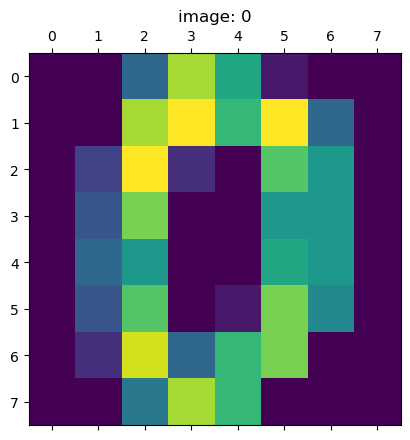

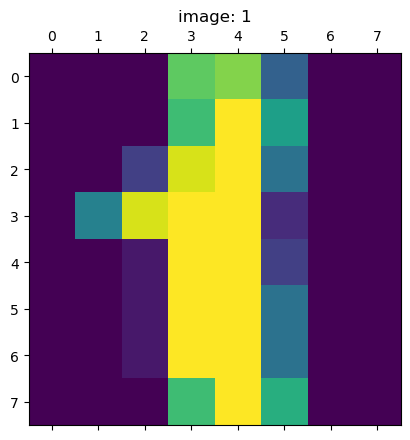

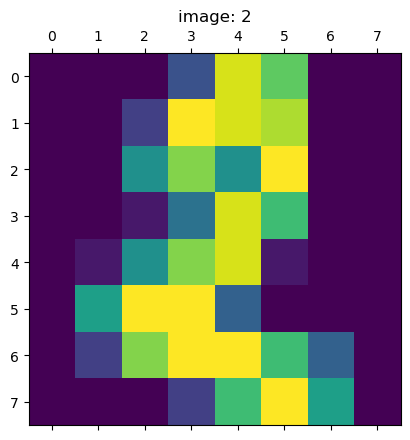

In [26]:
digits = load_digits()

print(f"Shape of the data: {digits.data.shape}")
print(f"Shape of the target: {digits.target.shape}")

for i in range(3):
    plt.matshow(digits.images[i])
    plt.title(f"image: {digits.target[i]}")
    plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

print(f"TrainingShape: {X_train.shape}")
print(f"TestingShape: {X_test.shape}")

TrainingShape: (1257, 64)
TestingShape: (540, 64)


In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', max_iter=300, verbose=True, random_state=42)
mlp.fit(X_train, y_train)

Iteration 1, loss = 7.31191156
Iteration 2, loss = 4.17020917
Iteration 3, loss = 2.73863864
Iteration 4, loss = 1.96567516
Iteration 5, loss = 1.42004540
Iteration 6, loss = 1.06709009
Iteration 7, loss = 0.84762772
Iteration 8, loss = 0.69473116
Iteration 9, loss = 0.57929193
Iteration 10, loss = 0.49466739
Iteration 11, loss = 0.42974755
Iteration 12, loss = 0.37888153
Iteration 13, loss = 0.33769441
Iteration 14, loss = 0.30102209
Iteration 15, loss = 0.27175640
Iteration 16, loss = 0.24805525
Iteration 17, loss = 0.22666523
Iteration 18, loss = 0.20930394
Iteration 19, loss = 0.19318633
Iteration 20, loss = 0.17744551
Iteration 21, loss = 0.16711897
Iteration 22, loss = 0.15404647
Iteration 23, loss = 0.14384386
Iteration 24, loss = 0.13363978
Iteration 25, loss = 0.12589594
Iteration 26, loss = 0.11870701
Iteration 27, loss = 0.11238361
Iteration 28, loss = 0.10481122
Iteration 29, loss = 0.09925368
Iteration 30, loss = 0.09302298
Iteration 31, loss = 0.08855591
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, random_state=42,
              verbose=True)

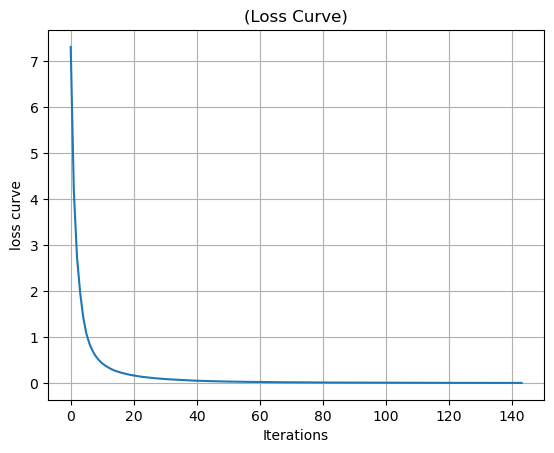

In [29]:
# TODO 2: After you finish the training, I want to see the plot of the learning curve (loss curve) of the model.
# model.loss_curve_ is a list of loss values at each iteration.
plt.plot(mlp.loss_curve_)
plt.title("(Loss Curve)")
plt.xlabel("Iterations")
plt.ylabel("loss curve")
plt.grid(True)
plt.show()

plotting resource: https://www.w3schools.com/python/matplotlib_plotting.asp

In [30]:
# TODO 3: After you finish the training, I want to see the classification report of the model.
# Print the classification report on the test set.
# Display CONFUSION MATRIX on TEST set
# Extra: Display the confusion matrix in a nice way (with labels and colors)
# Show wrong predictions with the true and predicted labels on the test set.


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      1.00      0.99        60
           5       0.97      0.95      0.96        66
           6       1.00      0.98      0.99        53
           7       1.00      0.98      0.99        55
           8       0.91      1.00      0.96        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



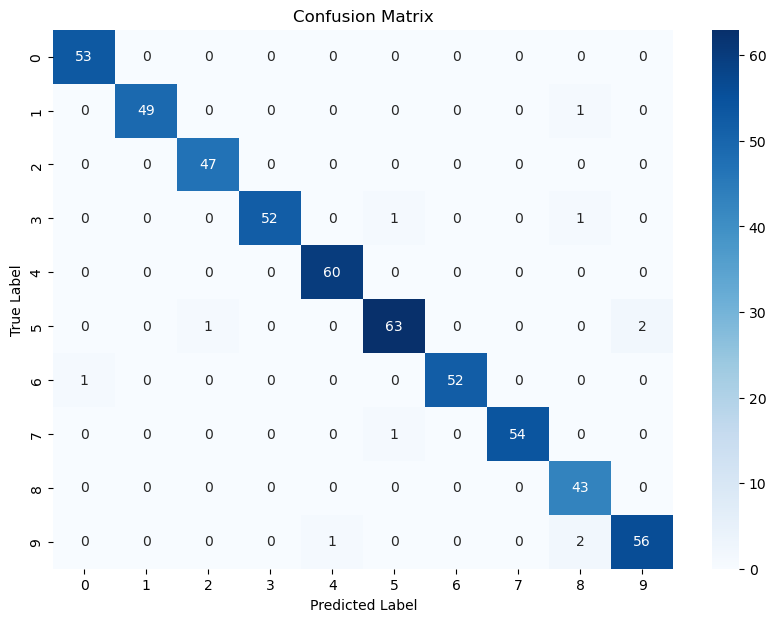

In [31]:
y_pred = mlp.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Wrong Predictions:


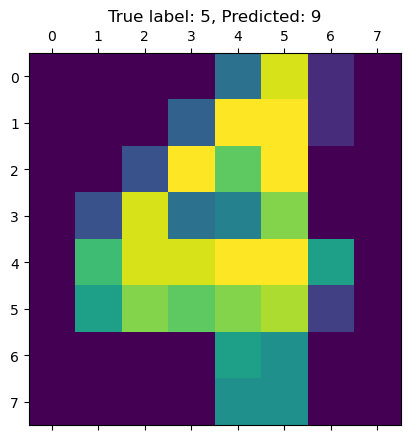

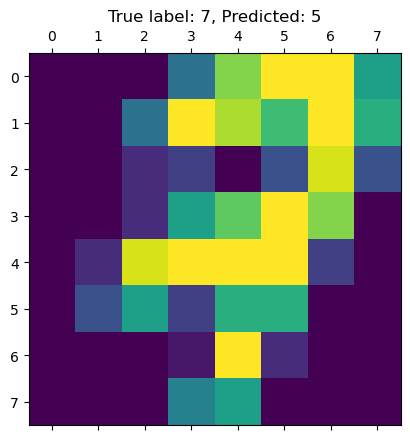

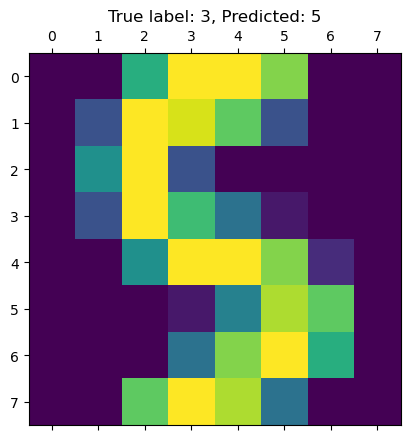

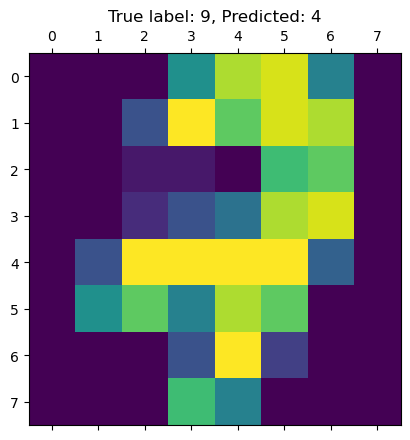

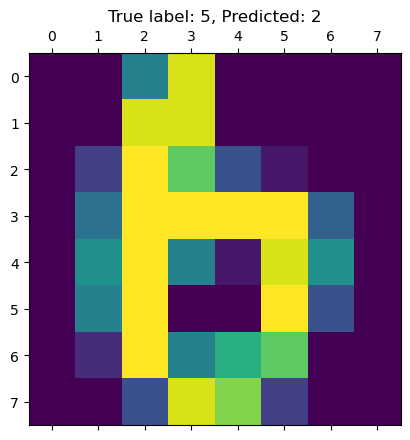

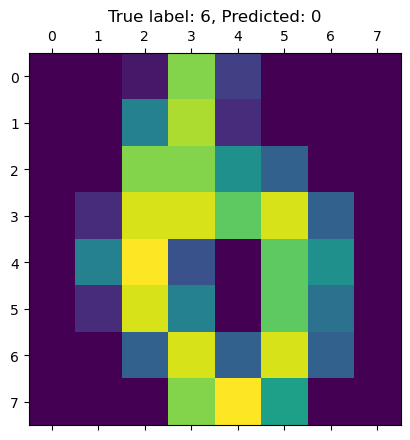

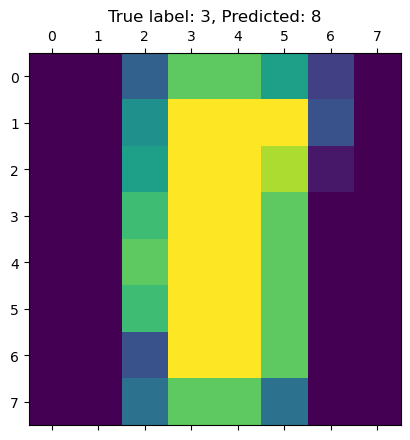

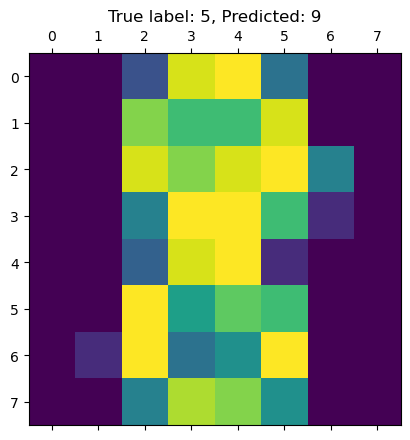

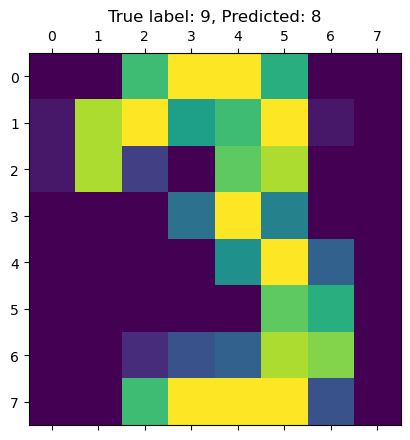

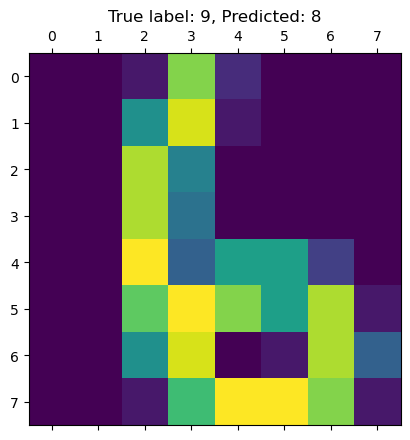

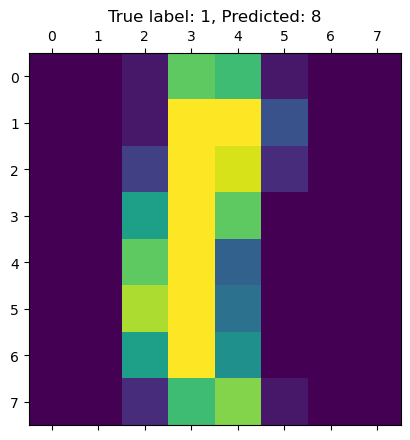

In [34]:
wrong_predictions = np.where(y_test != y_pred)[0]

print("\nWrong Predictions:")
for idx in wrong_predictions:
    plt.matshow(digits.images[digits.data.shape[0] // 3 + idx])
    plt.title(f"True label: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.show()

Classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Confusion matrix as a prettier: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [32]:
# TODO 4: Think of a way to test different hyperparameters of the model and compare the results. (Method already explained in the code review)

# :( I don't think that I understand this todo.